In [1]:
import sympy as symp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import ODE as ODE

# 第三章作业补充
由于交上一次作业时间仓促，第8、10、11题没来得及提交，以下是这三道题的解答

8. 解答见代码

In [40]:
b = [1,1]
A = np.array([[1,2],[3,2]])
B = np.array([[3,2],[1,2]])

def preconditioning(X):
    eigenvalues, eigenvectors = np.linalg.eig(abs(X))

    print("矩阵的本征值：")
    print(eigenvalues)

    for i in range(len(eigenvalues)):
        if abs(eigenvalues[i]) > 1:
            X = X - (eigenvalues[i] - 0.9) * np.outer(eigenvectors[:, i], eigenvectors[:, i])
    return X

def Eig(X):
    eigenvalues, eigenvectors = np.linalg.eig(np.abs(X))
    print('矩阵的特征值是',eigenvalues)
    eig = np.max(eigenvalues)
    print(eig)
    
Eig(A)
Eig(B)

def jacobi_iteration(A, b, x0, max_iterations=100, tol=1e-6):
    D = np.diag(np.diag(A))
    R = A - D
    x = x0
    for i in range(max_iterations):
        x_new = np.linalg.inv(D).dot(b - R.dot(x))
        if np.linalg.norm(x_new - x) < tol:
            return x_new
        x = x_new
    return x

def gauss_seidel_iteration(A, b, x0, max_iterations=100, tol=1e-6):
    D = np.diag(np.diag(A))
    L = np.tril(A, k=-1)
    U = np.triu(A, k=1)
    x = x0
    for i in range(max_iterations):
        x_new = np.linalg.inv(D - L).dot(b - U.dot(x))
        if np.linalg.norm(x_new - x) < tol:
            return x_new
        x = x_new
    return x

x0 = np.zeros_like(b)

x_jacobi = jacobi_iteration(A, b, x0)
print("Jacobi 迭代的解：")
print(x_jacobi)

x_gauss_seidel = gauss_seidel_iteration(A, b, x0)
print("Gauss-Seidel 迭代的解：")
print(x_gauss_seidel)

# 计算 Jacobi 迭代的迭代谱半径
eigenvalues_jacobi = np.abs(np.linalg.eigvals(A - np.diag(np.diag(A))))
spectral_radius_jacobi = np.max(eigenvalues_jacobi)
print("Jacobi 迭代的迭代谱半径：")
print(spectral_radius_jacobi)

# 计算 Gauss-Seidel 迭代的迭代谱半径
eigenvalues_gauss_seidel = np.abs(np.linalg.eigvals(A - np.tril(A)))
spectral_radius_gauss_seidel = np.max(eigenvalues_gauss_seidel)
print("Gauss-Seidel 迭代的迭代谱半径：")
print(spectral_radius_gauss_seidel)

矩阵的特征值是 [-1.  4.]
4.0
矩阵的特征值是 [4. 1.]
4.0
Jacobi 迭代的解：
[ 0.00000000e+00 -3.58948994e+23]
Gauss-Seidel 迭代的解：
[-1.71792507e+47 -2.57688760e+47]
Jacobi 迭代的迭代谱半径：
2.4494897427831783
Gauss-Seidel 迭代的迭代谱半径：
0.0


10. 解答见代码

In [41]:
import numpy as np

# 定义矩阵A
A = np.array([[1, 2, 0],
              [2, 1, 2],
              [0, 2, 1]], dtype=float)

# (1) 使用Givens变换将A转化为上三角矩阵
m, n = A.shape
Q = np.eye(m) #QR分解所用
R = A.copy()

for j in range(n):
    for i in range(m-1, j, -1):
        G = np.eye(m)
        c, s = np.cos(np.arctan2(R[i, j], R[i-1, j])), np.sin(np.arctan2(R[i, j], R[i-1, j]))
        G[[i-1, i], [i-1, i]] = c
        G[i-1, i] = -s
        G[i, i-1] = s
        R = np.dot(G.T, R)
        Q = np.dot(Q, G)

# 输出上三角矩阵R
print("上三角矩阵R:")
print(R)

# (2) 使用Householder变换将A转化为上三角矩阵
m, n = A.shape
H = np.eye(m) #QR分解所用
R = A.copy()

for j in range(n):
    u = R[j:, j].copy()
    u[0] += np.sign(u[0]) * np.linalg.norm(u)
    u = u / np.linalg.norm(u)
    R[j:, j:] -= 2.0 * np.outer(u, np.dot(u, R[j:, j:]))
    H[j:, :] -= 2.0 * np.outer(u, np.dot(u, H[j:, :]))

# 输出上三角矩阵R
print("上三角矩阵R:")
print(R)

# (3) 计算矩阵A的本征值与本征向量
eigenvalues, eigenvectors = np.linalg.eig(A)

# 输出本征值
print("矩阵A的本征值:")
print(eigenvalues)

# 输出本征向量
print("矩阵A的本征向量:")
print(eigenvectors)

上三角矩阵R:
[[ 2.23606798e+00  1.78885438e+00  1.78885438e+00]
 [-1.23697944e-16  2.40831892e+00  3.32181919e-01]
 [-1.84398008e-16 -2.22044605e-16 -1.29986737e+00]]
上三角矩阵R:
[[-2.23606798e+00 -1.78885438e+00 -1.78885438e+00]
 [ 0.00000000e+00  2.40831892e+00  3.32181919e-01]
 [ 0.00000000e+00  2.22044605e-16 -1.29986737e+00]]
矩阵A的本征值:
[ 3.82842712  1.         -1.82842712]
矩阵A的本征向量:
[[-5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [-7.07106781e-01 -8.15320034e-17 -7.07106781e-01]
 [-5.00000000e-01 -7.07106781e-01  5.00000000e-01]]


11. 用SVD分解得到三个泡利矩阵之和的本征值和本征向量为

In [2]:
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
sigma_sum = sigma_x + sigma_y + sigma_z

U, s, VT = np.linalg.svd(sigma_sum)
S = np.diag(s)
A = U.dot(S.dot(VT))
eigvals, eigvecs = np.linalg.eig(A)

print("The eigenvalues are:", eigvals)
print("The eigenvectors are:", eigvecs)

The eigenvalues are: [ 1.73205081-2.18628921e-17j -1.73205081+1.32885195e-16j]
The eigenvectors are: [[ 0.88807383+0.j         -0.32505758+0.32505758j]
 [ 0.32505758+0.32505758j  0.88807383+0.j        ]]


# 第四章习题

1. 显式欧拉方法、预估校正欧拉方法得到的数值解与严格解如下，可以看到不同方法得到的解与严格解相近，并且预估-校正方法的误差明显小于显式欧拉方法

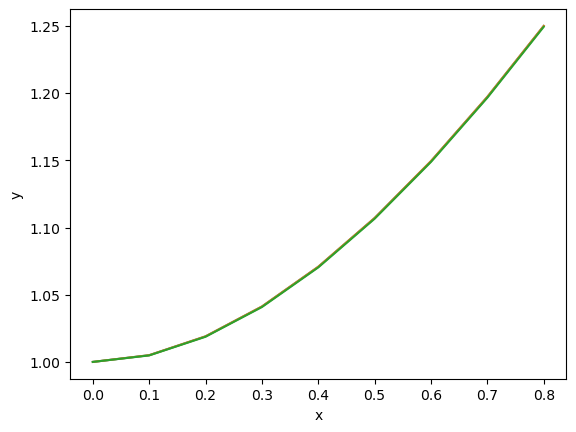

In [3]:
x = symp.symbols("x")
y = symp.symbols("y")
xlist1, ylist1 = ODE.Euler_ODE(-y + x + 1, [x, y], 0, 1, method="explicit")
xlist2, ylist2 = ODE.Euler_ODE(-y + x + 1, [x, y], 0, 1, step=8,method="estimate-corretion")
xlist3 = xlist2.copy()
ylist3 = [(x + symp.exp(-x)).subs({x: element}) for element in xlist3]

error1 = [np.abs(ylist3[i]-ylist1[i]) for i in range(len(xlist1))]
error2 = [np.abs(ylist3[i]-ylist2[i]) for i in range(len(xlist2))]

plt.plot(xlist1, ylist2)
plt.plot(xlist2, ylist2)
plt.plot(xlist3, ylist3)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

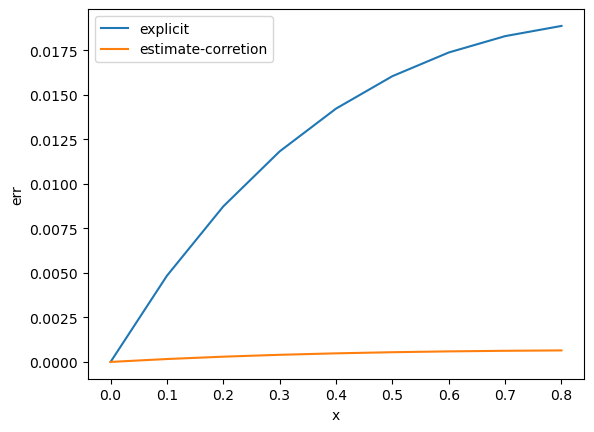

In [4]:
plt.plot(xlist1, error1, label="explicit")
plt.plot(xlist2, error2, label="estimate-corretion")
plt.xlabel(x)
plt.ylabel('err')
plt.legend()
plt.show()

2. 展开到2阶和四阶结果与严格解如下所示，可以看到解是相近的

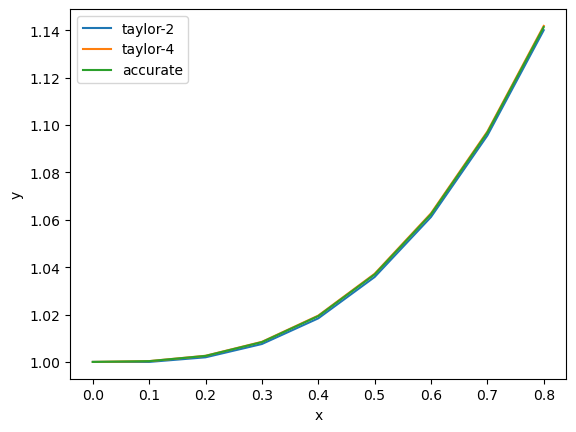

In [5]:
x = symp.symbols("x")
y = symp.symbols("y")
xlist4, ylist4 = ODE.Euler_ODE(-y + x**2 + 1, [x, y], 0, 1, method="taylor")
xlist5, ylist5 = ODE.Euler_ODE(
    -y + x**2 + 1, [x, y], 0, 1, method="taylor", taylor_order=5
)
xlist6 = xlist4.copy()
ylist6 = [
    (-2 * symp.exp(-x) + x**2 - 2 * x + 3).subs({x: element}) for element in xlist6
]

plt.plot(xlist4, ylist4, label="taylor-2")
plt.plot(xlist5, ylist5, label="taylor-4")
plt.plot(xlist6, ylist6, label="accurate")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

3. 用RK4方法得到

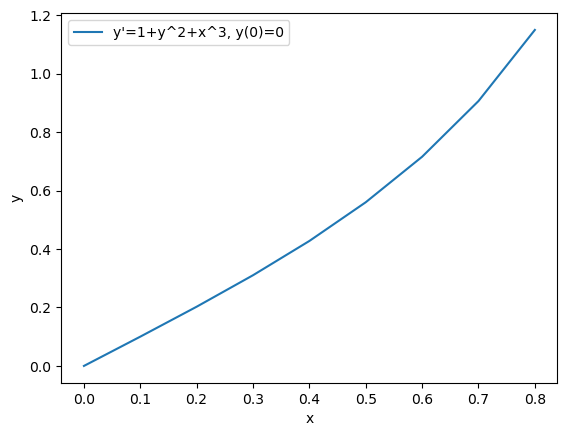

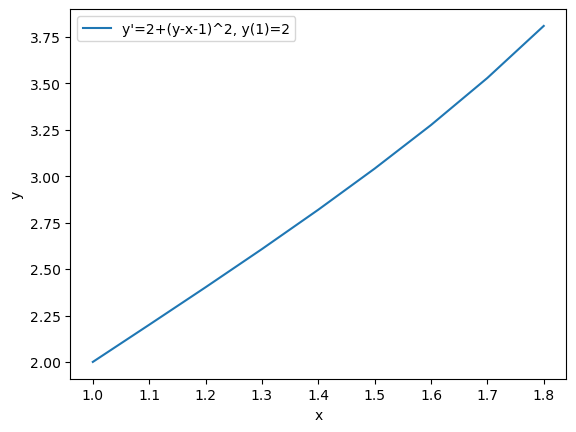

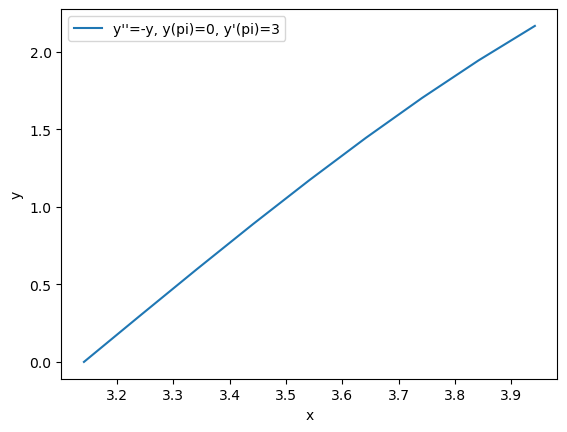

In [6]:
x = symp.symbols("x")
y = symp.symbols("y")
yprime = symp.symbols("yprime")
xlist7, ylist7 = ODE.RK4(1 + y**2 + x**3, [x, y], 0, 0)
xlist8, ylist8 = ODE.RK4(2 + (y - x - 1) ** 2, [x, y], 1, 2)
xlist9, ylist9 = ODE.RK4([yprime, -y], [x, y, yprime], np.pi, [0, 3])
ylist9 = [element[0] for element in ylist9]
plt.plot(xlist7, ylist7, label="y'=1+y^2+x^3, y(0)=0")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()
plt.plot(xlist8, ylist8, label="y'=2+(y-x-1)^2, y(1)=2")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()
plt.plot(xlist9, ylist9, label="y''=-y, y(pi)=0, y'(pi)=3")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

4. 令$x_1=x',y_1=y',y_2=y''$，得到
\begin{equation}
    \begin{array}{l}
    {x_1}^\prime  = x - y - 3x_1^2 + y_1^3 + 6{y_2} + 2t\\
    {y_2}^\prime  = {y_2} - {x_1} + {e^x} - t\\
    x' = {x_1}\\
    y' = {y_1}\\
    {y_1}^\prime  = {y_2}\\
    x\left( 1 \right) = 2\quad {x_1}\left( 1 \right) = 4\quad y\left( 1 \right) =  - 2\quad {y_1}\left( 1 \right) = 7\quad {y_2}\left( 1 \right) = 6
    \end{array}
\end{equation}

用RK4方法数值求解得到（数值解过大，此处降低迭代次数，且仅输出数值解）

In [5]:
t = symp.symbols("t")
x = symp.symbols("x")
y = symp.symbols("y")
x1 = symp.symbols("x1")
y1 = symp.symbols("y1")
y2 = symp.symbols("y2")
xlist10, ylist10 = ODE.RK4(
    [
        x1,
        x - y - 3 * x1**2 + y1**3 + 6 * y2 + 2 * t,
        y1,
        y2,
        y2 - x1 + symp.exp(x) - t,
    ],
    [t, x, x1, y, y1, y2],
    1,
    [2, 4, -2, 7, 6],
    step=5,
)
print(xlist10, ylist10)

[1.0, 1.1, 1.2, 1.3, 1.4, 1.5] [[2, 4, -2, 7, 6], [-2.03583627145102, -2333.32202423804, -1.27456989256241, 7.65748835750575, 11.7279544695502], [-2.53038206825188e+19, -1.15251001373403e+41, 33.8642943553947, 83839583.9908742, 2.53038206826027e+19], [-8.86431586524496e+320, -1.41436972365900e+644, 8.30174582348264e+76, 4.96216682767523e+158, 8.86431586524496e+320], [-4.56027646345672e+5145, -3.74330185616832e+10293, 1.25027607200203e+1283, 1.12549698447899e+2571, 4.56027646345672e+5145], [-1.09780792057024e+82341, -2.16932801484017e+164684, 8.75769299149572e+20581, 5.52219743039712e+41168, 1.09780792057024e+82341]]


5. 用RK4方法得到$p,q$的解为，解很像三角函数，但是能量不守恒

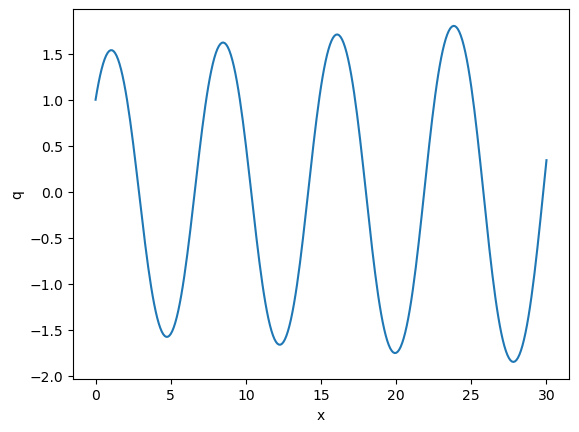

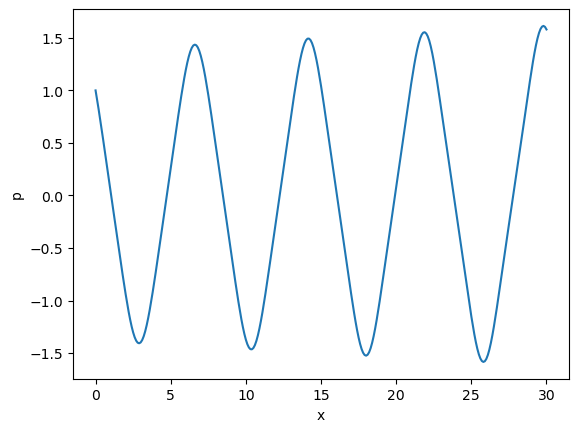

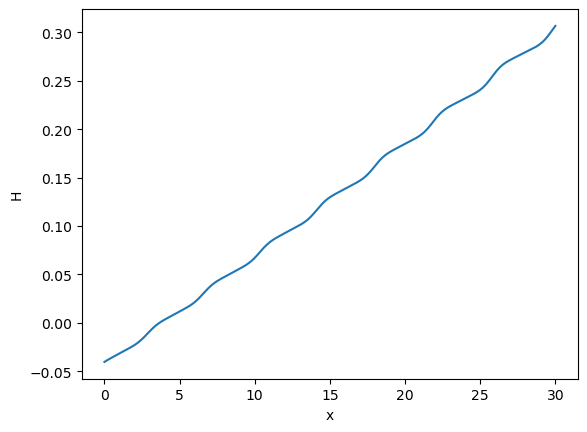

In [25]:
t = symp.symbols("t")
q = symp.symbols("q")
p = symp.symbols("p")
xlist11, ylist11 = ODE.RK4([p, -symp.sin(q)], [t, q, p], 0, [1, 1],step=300)
ylistq = [element[0] for element in ylist11]
ylistp = [element[1] for element in ylist11]
Hlist = [
    (ylistp[i] ** 2) / 2 - np.cos(np.array(ylistq, dtype=np.float64))[i]
    for i in range(len(xlist11))
]
plt.plot(xlist11, ylistq)
plt.xlabel(x)
plt.ylabel(q)
plt.show()
plt.plot(xlist11, ylistp)
plt.xlabel(x)
plt.ylabel(p)
plt.show()
plt.plot(xlist11, Hlist)
plt.xlabel(x)
plt.ylabel("H")
plt.show()

6. 见代码

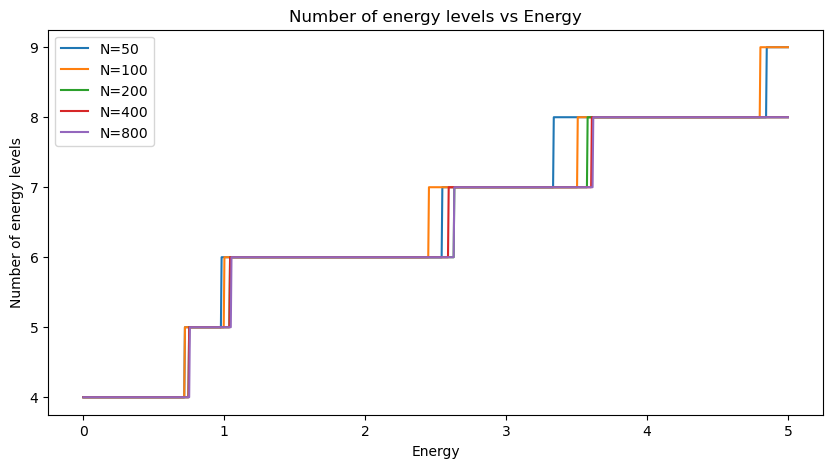

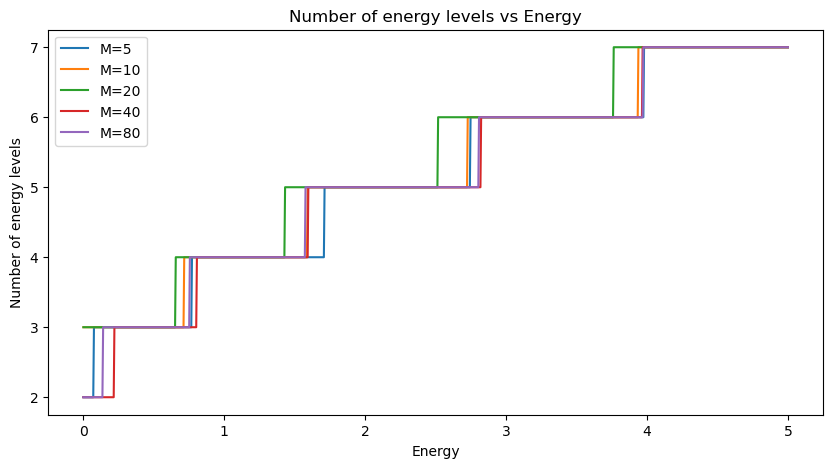

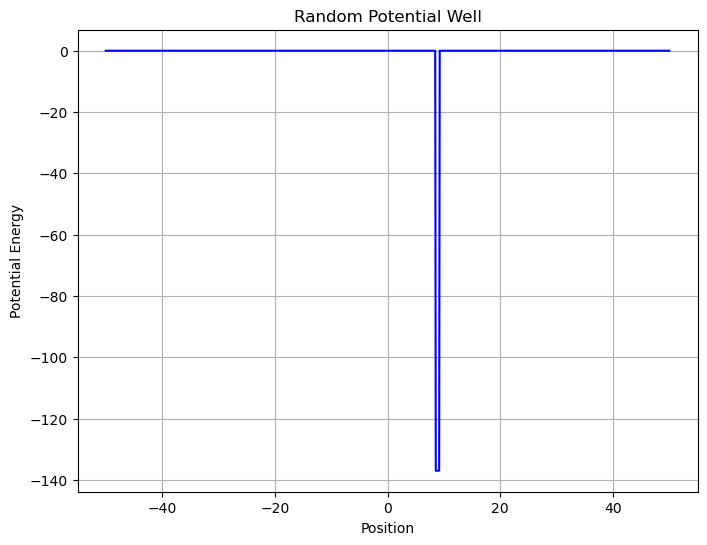

In [27]:
def potential(x, a, b, V0):
    if x < a or x > b:
        return 0
    else:
        return -V0

def solve_schrodinger_eq(N, L, V0, E_max):
    # 定义一个函数solve_schrodinger_eq，它接受四个参数：N（离散化的点数）、L（空间范围）、V0（势能）、E_max（最大能量）

    dx = L / N
    # 计算离散化步长

    H = np.zeros((N, N))
    # 创建一个N×N的零矩阵H，用于表示哈密顿矩阵，其中ij元表示波函数在xi为中心的差分fi中的xj波函数的系数，即它感受到的势场与能量。

    for i in range(N):
        # 遍历离散化的点                  
        x = (i + 0.5) * dx
        # 计算离散点对应的位置
        H[i, i] = 2 / dx**2 + potential(x, L/3, 2*L/3, V0)
        # 填充哈密顿矩阵的对角元素，势能项为xi点处的势能
        if i > 0:
            H[i, i-1] = -1 / dx**2
        # 填充哈密顿矩阵的下对角元素
        if i < N-1:
            H[i, i+1] = -1 / dx**2
        # 填充哈密顿矩阵的上对角元素

    eigenvalues, eigenvectors = np.linalg.eigh(H)
    # 求解哈密顿矩阵的特征值和特征向量

    energy_levels = []
    for E in np.linspace(0, E_max, 1000):
        # 对能量进行遍历
        num_states = np.sum(eigenvalues < E)
        # 计算小于当前能量的特征值数量
        energy_levels.append(num_states)
        # 将数量添加到能级列表中

    return energy_levels
    # 返回能级数量随能量的变化


N_values = [50, 100, 200, 400, 800]                            #
L = 10
V0 = 10
E_max = 5

plt.figure(figsize=(10, 5))
for N in N_values:
    energy_levels = solve_schrodinger_eq(N, L, V0, E_max)
    plt.plot(np.linspace(0, E_max, 1000), energy_levels, label=f'N={N}')

plt.xlabel('Energy')
plt.ylabel('Number of energy levels')
plt.title('Number of energy levels vs Energy')
plt.legend()
plt.show()

def random_potential_wells(N, x, V):
    wells = []
    for _ in range(N):
        V0 = np.random.uniform(V/2, V*2)  # 随机生成V0
        a = np.random.uniform(-10, 10)  # 随机生成a
        width = np.random.uniform(0.5, 2)  # 随机生成井宽度
        b = a + width
        well = {'V0': V0, 'a': a, 'b': b}
        wells.append(well)                        #注：也可以加入检测函数来检测生成的势井是否重合，但这会让程序运行的非常慢。

    def potential(x):
        for well in wells:
            if x < well['a'] or x > well['b']:
                return 0
            else:
                return -well['V0']

    return np.vectorize(potential)(x)

    
    

def solve_schrodinger_eq1(M, N, L, V0, E_max):
    # 定义一个函数solve_schrodinger_eq，它接受五个参数：M（方势井数目），N（离散化的点数）、L（空间范围）、V0（势能）、E_max（最大能量）

    dx = L / N
    # 计算离散化步长

    H = np.zeros((N, N))
    # 创建一个N×N的零矩阵H，用于表示哈密顿矩阵，其中ij元表示波函数在xi为中心的差分fi中的xj波函数的系数，即它感受到的势场与能量。

    for i in range(N):
        # 遍历离散化的点                  
        x = (i + 0.5) * dx
        # 计算离散点对应的位置
        H[i, i] = 2 / dx**2 + random_potential_wells(M, x, V0)
        # 填充哈密顿矩阵的对角元素，势能项为xi点处的势能
        if i > 0:
            H[i, i-1] = -1 / dx**2
        # 填充哈密顿矩阵的下对角元素
        if i < N-1:
            H[i, i+1] = -1 / dx**2
        # 填充哈密顿矩阵的上对角元素

    eigenvalues, eigenvectors = np.linalg.eigh(H)
    # 求解哈密顿矩阵的特征值和特征向量

    energy_levels = []
    for E in np.linspace(0, E_max, 1000):
        # 对能量进行遍历
        num_states = np.sum(eigenvalues < E)
        # 计算小于当前能量的特征值数量
        energy_levels.append(num_states)
        # 将数量添加到能级列表中

    return energy_levels
    # 返回能级数量随能量的变化


M_values = [5, 10, 20, 40, 80]  

L = 10
V0 = 10                      #设置势井深度
E_max = 5                    #设置束缚态能量

plt.figure(figsize=(10, 5))
for M in M_values:
    energy_levels = solve_schrodinger_eq1(M, 1000, L, V0, E_max)
    plt.plot(np.linspace(0, E_max, 1000), energy_levels, label=f'M={M}')

plt.xlabel('Energy')
plt.ylabel('Number of energy levels')
plt.title('Number of energy levels vs Energy')
plt.legend()
plt.show()

N = 1000                             #取点数
L = 100
V0 = 100
x = np.linspace(-L/2, L/2, N)

V = random_potential_wells(5, x, V0)  # 假设有3个势井
plt.figure(figsize=(8, 6))
plt.plot(x, V, color='b', label='Potential Well')
plt.xlabel('Position')
plt.ylabel('Potential Energy')
plt.title('Random Potential Well')
plt.grid(True)
plt.show()

7. 方程的解见代码

In [32]:
x = symp.symbols('x')
q = symp.Piecewise((0.5 + x, x <= 0.5), (1, x > 0.5))
xlist12, ylist12 = ODE.FiniteDiff([q, 0, 1, x], [[0, 0], [1, 0]], h=0.25)
print(f'x:{xlist12}\n y:{ylist12}')

x:[0.0, 0.25, 0.5, 0.75, 1.0]
 y:[0, -0.04372040226317376, -0.06976641067026125, -0.06020201841045743, 0]


8. 方程的解见代码

x:[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0] 
 y:[4.44089209850063e-16, 0.156734487248432, 0.300275785641288, 0.432869649842589, 0.556590558014963, 0.673374167768282, 0.785047600211395, 0.893358025911688, 1.00000000000000]


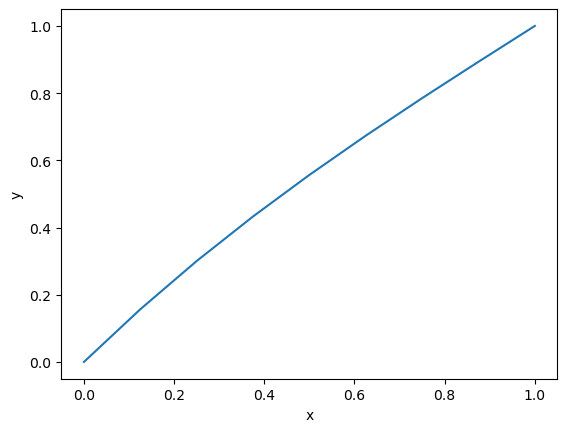

In [35]:
x = symp.symbols('x')
xlist13, ylist13 = ODE.Shooting([np.pi**2/4,0,1,np.pi**2/4],[[0,0],[1,1]])
print(f'x:{xlist13} \n y:{ylist13}')
plt.plot(xlist13, ylist13)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

9. 用我写的代码会出现奇异矩阵，代码还没有优化。手算得到无论是配置法还是最小二乘法a=-0.25        
代码见ODE.py。出现奇异矩阵是因为两个边界条件给出同一个方程，优化方法见代码中的TODO注释